# **M2-INASYS / OPTIMSYS Course 1: Assignment**


## **Topic : Obesity modelling**

Overweight and obesity are considered by the WHO as serious health concerns. They pose health risks to all individuals living with these conditions. The WHO defines obesity as an abnormal or excessive accumulation of body fat that significantly impacts both a patient’s daily life and overall health.

Faced with this serious health issue, imagine you have been tasked with modeling the problem. The goal is to build a predictive model using historical data about people suffering from obesity, in order to guide public health measures. Based on specific characteristics, the model would help determine an individual’s level or risk of obesity.

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzA1xo7EZ1ZHwDutoxg7416XBcErk_P7f0Pg&s)


As **SARA la Data**, go to https://github.com/EDJINEDJA/Health-Data-modelling.git to download historical information about people suffering from obesity in order to begin the modeling process. The data, located in the **lab1** folder and in CSV format (Comma-Separated Values), is now your property. Enjoy!



*!!!!!!* **The expected files are: the report and the code.**

# **Section 1**

### **Part 1**

#### Q1: Use both your clinical knowledge and data analysis background to describe and present the data provided to you.

Answer : 

In [8]:
#importation des biblio
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_binary=pd.read_csv('Health-Data-modelling/lab1/obesity_binary.csv')
print(df_binary.shape)
df_binary

(8, 7)


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,0,0,1,0,0,1,0
1,1,1,0,1,1,0,1
2,0,1,1,1,1,0,1
3,1,0,1,1,1,0,1
4,1,1,0,0,0,1,0
5,0,0,0,1,1,1,1
6,0,1,1,0,0,1,0
7,1,0,0,1,1,0,1


###### obesity_data

**variable target** : ObesityCategory ['Normal weight', 'Obese', 'Overweight', 'Underweight']

**lignes et colonnes** : 1000, 7

**variables** : Age , Gender, Height, Weight, BMI, PhysicalActivityLevel

**types de variables** : qualitatives : 29%, quantitatives : 61%

**Analyse des valeurs manquantes** : aucune valeure null

In [199]:
df=pd.read_csv('Health-Data-modelling/lab1/obesity_data.csv')
print(df.shape)
df.head()

(1000, 7)


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [14]:
df['ObesityCategory'].unique()

array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


<Axes: ylabel='proportion'>

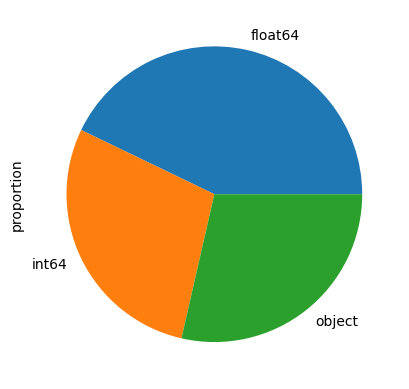

In [16]:
df.dtypes.value_counts('%').plot.pie()

In [17]:
df.isna().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

<Axes: >

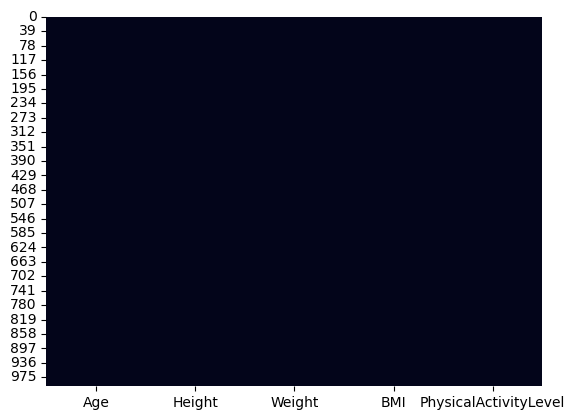

In [135]:
 sns.heatmap(df.isna(),cbar=False)

In [19]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [20]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

### **Part 2**

 Q2 : What kind of learning do you need to extract knowledge?

Answer : C’est un problème d’apprentissage supervisé .

Q3 : Which task of the selected type of learning do you need to perform to extract knowledge?

Answer :classification

Q4 : Define and comment on the evaluation metrics you need to select the best model. Justify your answer rigorously with examples.

Answer : 

Dans ce problème de classification multiclasse (Normal weight, Overweight, Obese, Underweight), l’accuracy donne une idée générale de la qualité du modèle, mais elle peut être trompeuse si une classe est dominante.

Il est donc nécessaire d’utiliser d’autres métriques :

Precision, Recall et F1-score par classe, afin d’évaluer la performance sur chaque catégorie.

Le F1-score macro est particulièrement adapté, car il donne le même poids à toutes les classes, même les moins représentées.

Enfin, la confusion matrix permet d’identifier quelles classes sont souvent confondues (par exemple entre Overweight et Obese).

Ces métriques sont essentielles pour sélectionner le meilleur modèle car elles garantissent qu’il fonctionne correctement non seulement sur la majorité des individus, mais aussi sur les cas les plus critiques du point de vue de la santé publique.

Q5 : According to the defined problem, what is the variable of interest?

Answer : ObesityCategory

Q6 : Still in this context, what is the explanatory variable?

Answer : Age, Gender, Height, Weight, BMI, PhysicalActivityLevel

## **Part3**

Q7 : Since computers cannot interpret categorical variables directly, it is necessary to preprocess the data to make it machine-readable. Do not hesitate to perform further data processing (e.g., handling missing values, removing irrelevant variables, etc.).

Answer :

**Encoder les variables catégorielles** : transformer les variables qualitatives (Gender, ObesityCategory) en valeurs numériques (par exemple, 0 pour Male, 1 pour Female).

**1)Encodage**

In [201]:
def encodage(df):
    code = {
        'Normal weight':0,
        'Obese':1,
        'Overweight':2,
        'Underweight':3,
        'Male':1,
        'Female':0
    }
    
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].map(code).astype(int)  # <- conversion en int
    
    return df

In [203]:
encodage(df)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0
...,...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4,2
996,35,0,165.076490,97.639771,35.830783,1,1
997,49,0,156.570956,78.804284,32.146036,1,1
998,64,1,164.192222,57.978115,21.505965,4,0


## **Part 4**

One problem we encountered during the learning process is the issue of generalizability. It is a phenomenon where the model overlearns, including the noise in the data, which limits its ability to perform well on unseen data.

That is why, in order to perform good modelling, it is essential to keep a portion of the data aside to evaluate the model after training. This helps give an idea of how well the training actually worked.

![image.png](https://miro.medium.com/1*0mYlQihIDkCziGeYO-ePCQ.png)

Typical splits are 60% for training and 40% for testing or 80/20.

Q8: Split the overall dataset into a training set and a test set

In [207]:
from sklearn.model_selection import train_test_split

X = df.drop("ObesityCategory", axis=1)
y = df["ObesityCategory"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

In [169]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((600, 6), (600,), (400, 6), (400,))

## **Part 5**

#### Q9 : Build a decision tree model using Scikit-learn. Keep the default hyperparameters of the chosen algorithm. Specify which decision tree algorithm was used.
See the documentation here: https://scikit-learn.org/.

In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model1 = DecisionTreeClassifier()  
model1.fit(X_train, y_train)


DecisionTreeClassifier()

#### Q10 : Use the test set to evaluate how well your model generalizes to unseen data. Provide a clear explanation of all the evaluation metrics used.

Answer : ....

In [211]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9975
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       149
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00       118
           3       1.00      0.98      0.99        57

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion matrix:
 [[149   0   0   0]
 [  0  76   0   0]
 [  0   0 118   0]
 [  1   0   0  56]]


## **Part 6**

Q11 : Using the same algorithm, propose an alternative criterion for selecting the root node.

In [213]:
model2 = DecisionTreeClassifier(criterion="entropy", random_state=0)  
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Q12 : Use the test set to evaluate how well your new model generalizes to unseen data.

In [215]:

y_pred = model2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9975
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       149
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00       118
           3       1.00      0.98      0.99        57

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion matrix:
 [[149   0   0   0]
 [  0  76   0   0]
 [  0   0 118   0]
 [  1   0   0  56]]


### **Part 7**

Q13 : Display the decision tree for both Model 1 and Model 2.

##### For model1

In [217]:
import sys
!{sys.executable} -m pip install graphviz
from graphviz import Source

from IPython.display import display, SVG
from sklearn.tree import export_graphviz

In [219]:
graph = Source(export_graphviz(model1, out_file=None, 
                               feature_names=X_train.columns,
                               class_names=[str(c) for c in model1.classes_],
                               filled=True, rounded=True))

In [126]:
[str(c) for c in model1.classes_]

['0', '1', '2', '3']

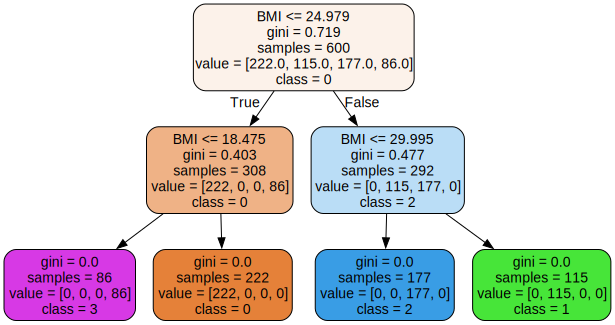

In [221]:
display(SVG(graph.pipe(format='svg')))

##### For model2

In [223]:
graph = Source(export_graphviz(model2, out_file=None, 
                               feature_names=X_train.columns,
                               class_names=[str(c) for c in model2.classes_],
                               filled=True, rounded=True))

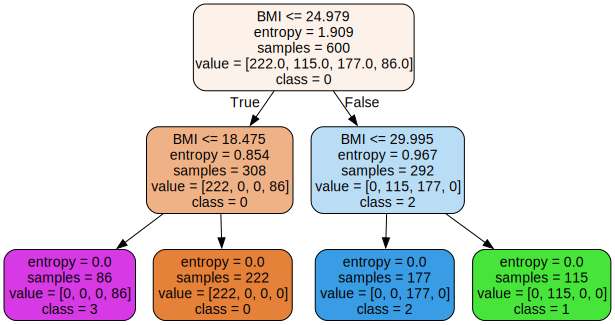

In [225]:
# The following requires graphviz on your computer
display(SVG(graph.pipe(format='svg')))

Q14 : Explain which one is more interpretable. Give your reasons.

Le modèle le plus interprétable est celui dont l’arbre est le plus simple, c’est-à-dire avec peu de nœuds et peu de feuilles.
Ici, les deux modèles (Gini et Entropy) ont exactement la même structure : profondeur = 2, 7 nœuds et 4 feuilles.
Cela signifie que les deux modèles sont très faciles à comprendre, car il suffit de suivre les quelques règles de l’arbre pour prédire la catégorie d’obésité.

In [227]:
print("COMPARAISON DES MODÈLES")

print("\nModèle 1 (Gini) :")
print(f"  - Profondeur maximale : {model1.get_depth()}")
print(f"  - Nombre de nœuds : {model1.tree_.node_count}")
print(f"  - Nombre de feuilles : {model1.get_n_leaves()}")

print("\nModèle 2 (Entropy) :")
print(f"  - Profondeur maximale : {model2.get_depth()}")
print(f"  - Nombre de nœuds : {model2.tree_.node_count}")
print(f"  - Nombre de feuilles : {model2.get_n_leaves()}")

COMPARAISON DES MODÈLES

Modèle 1 (Gini) :
  - Profondeur maximale : 2
  - Nombre de nœuds : 7
  - Nombre de feuilles : 4

Modèle 2 (Entropy) :
  - Profondeur maximale : 2
  - Nombre de nœuds : 7
  - Nombre de feuilles : 4


# **Section 2**

Now you will test one of the algorithms used to construct a decision tree! In this section, we will see how to perform this from scratch.

Therefore, due to the complexity involved in the construction, we will use another binary dataset available in the same folder under the name obesity_binary.

#### *Construct a decision tree using the ID3 algorithm based on information gain.*

**Information Gain**

Information Gain measures the reduction in entropy about the target variable after splitting a dataset based on a particular feature.

![image.png](https://spicerrobotboy.files.wordpress.com/2012/01/decision-tree-equations.png)


Q15 : Load data

Answer ...

In [96]:
df_binary=pd.read_csv('Health-Data-modelling/lab1/obesity_binary.csv')
print(df_binary.shape)
df_binary

(8, 7)


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,0,0,1,0,0,1,0
1,1,1,0,1,1,0,1
2,0,1,1,1,1,0,1
3,1,0,1,1,1,0,1
4,1,1,0,0,0,1,0
5,0,0,0,1,1,1,1
6,0,1,1,0,0,1,0
7,1,0,0,1,1,0,1


Q16 : Which attribute should be chosen for the root node?

L’attribut choisi pour le nœud racine est l’IMC (BMI), car c’est celui qui offre le gain d’information le plus élevé parmi toutes les caractéristiques.

Q17 : Write a function to build the tree and visualize the tree.

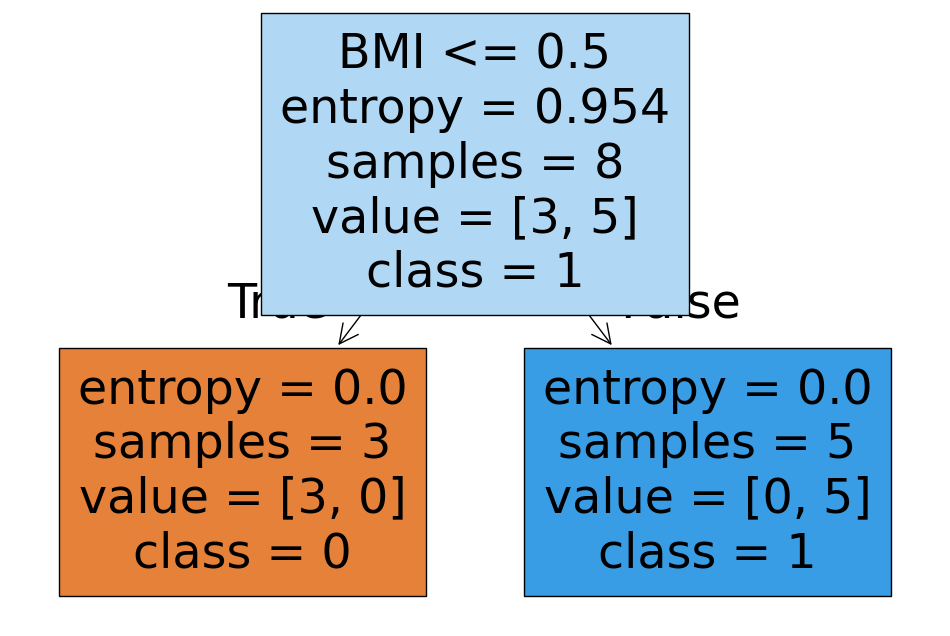

|--- BMI <= 0.50
|   |--- class: 0
|--- BMI >  0.50
|   |--- class: 1



In [104]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# X = features, y = target
X = df_binary.drop('ObesityCategory', axis=1)
y = df_binary['ObesityCategory']

# Créer l'arbre
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X, y)

# Visualiser l'arbre
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.show()

# Affichage en texte
print(export_text(tree, feature_names=list(X.columns)))


Q18 : What is the maximum depth of the tree?

In [106]:
max_depth = tree.get_depth()
print("Maximum depth of the tree:", max_depth)


Maximum depth of the tree: 1


Q19 : How many leaf nodes do you have?

In [108]:
n_leaves = tree.get_n_leaves()
print("Number of leaf nodes:", n_leaves)


Number of leaf nodes: 2


# **section 3**

Q20: Repeat the exercise (section 2) for the C4.5 algorithm.